In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('utf-8-test.csv')
df.head()


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [9]:
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         4815 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [26]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         4815 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [28]:
df.shape

(4815, 9)

In [8]:
import pandas as pd
from textblob import TextBlob

# Load the CSV file into a DataFrame
df = pd.read_csv('utf-8-test.csv', encoding='utf-8')

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    # Classify polarity as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Perform sentiment analysis on the 'text' column
df['sentiment'] = df['text'].apply(analyze_sentiment)

# Display the results
print(df[['text', 'sentiment']])


                                                   text sentiment
0     Last session of the day  http://twitpic.com/67ezh   Neutral
1      Shanghai is also really exciting (precisely -...  Positive
2     Recession hit Veronique Branquinho, she has to...   Neutral
3                                           happy bday!  Positive
4                http://twitpic.com/4w75p - I like it!!   Neutral
...                                                 ...       ...
4810                                                NaN   Neutral
4811                                                NaN   Neutral
4812                                                NaN   Neutral
4813                                                NaN   Neutral
4814                                                NaN   Neutral

[4815 rows x 2 columns]


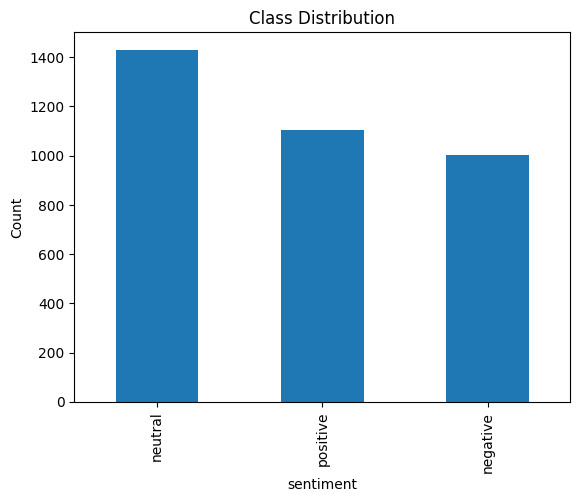

In [19]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()


In [3]:
df.dtypes

textID               object
text                 object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020    float64
Land Area (Km²)     float64
Density (P/Km²)     float64
dtype: object

In [4]:
np.sum(df.isnull().any(axis=1))



1281

In [5]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))


Count of columns in the data is:   9
Count of rows in the data is:   4815


<Axes: xlabel='Time of Tweet', ylabel='count'>

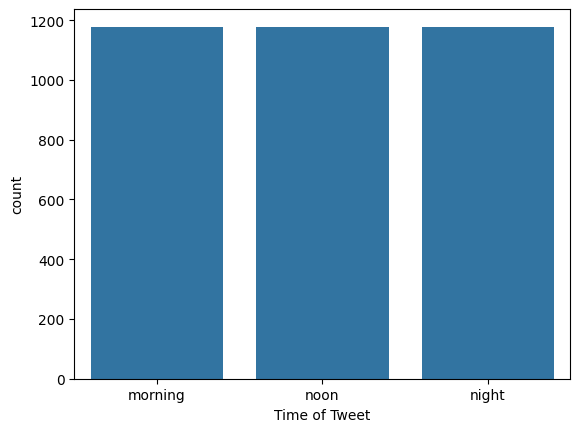

In [3]:
import seaborn as sns
sns.countplot(x='Time of Tweet', data=df)


In [19]:
def remove_special_characters(word):       
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))    
    return result
